In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
import os
os.chdir('C:/Users/adele/OneDrive/Documents/2024_WINTER/COSC3117/ass4 docs')

In [4]:
# Load the datasets
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

In [5]:
# Define features to be used, excluding 'name', 'ticket', and 'cabin'
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

In [6]:
# Preprocessing
categorical_features = ['sex', 'embarked', 'pclass']  # Including 'pclass' as categorical
numerical_features = ['age', 'sibsp', 'parch', 'fare']

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [8]:
# Neural network model pipeline
nn_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', StandardScaler(with_mean=False)),
                           ('classifier', MLPClassifier(random_state=1, max_iter=300))])

In [9]:
# Splitting the train_data into features and target
X_train = train_data[features]
y_train = train_data[target]

In [10]:
# Training the model
nn_model.fit(X_train, y_train)

C:\Users\adele\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'embarked',
                                                   'pclass'])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('classifier', MLPClassifier(max_iter=300, random_state=1))])

In [11]:
X_test = test_data[features]
y_test = test_data[target]

# Making predictions and evaluating
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.7967


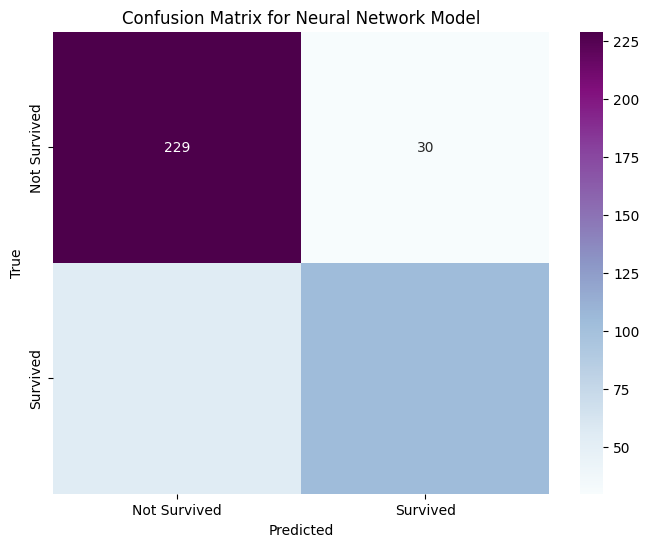

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Neural Network Model')
plt.show()
